In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# combined data headers
### pct_total,game_mode,win_value_underdog,blind_combo_0,blind_combo_1,level_0,level_1,lognormal,pct_high_mean,high_low_ratio_mean,high_low_ratio_variance,mean_variance_ratio,pct_high_sigma,underdog_mean,underdog_variance ###

In [29]:
# Read the combined data
df = pd.read_csv("combined.csv")
# Clean dataframe by removing rows with git conflict markers or blank lines
df = df[~df['pct_total'].str.contains('<<<<<<< HEAD|=======|>>>>>>>', na=False)]
df = df[~df['pct_total'].isna()]  # Remove blank lines
df = df[df['pct_total'] != '']  # Remove empty strings


C:\Users\csong\AppData\Local\Temp\ipykernel_25744\3477449946.py:2: DtypeWarning: Columns (0,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined.csv")


Filtering for cases in which we attain greater than 50% of the final reward in the expectation.

And then we filter for cases in which we are below 53% to refine our estimate of just nearly there.

In [ ]:
# Filter for rows where underdog_mean > 0.5
filtered_df = df[df['underdog_mean'] > 0.5]
# Display results
total_rows = len(df)
filtered_rows = len(filtered_df)
print(f"Total number of rows in dataset: {total_rows}")
print(f"Number of rows where underdog_mean > 0.5: {filtered_rows}")
print(f"Percentage: {(filtered_rows/total_rows)*100:.2f}%")

# Further filter for rows where underdog_mean is between 0.5 and 0.53
filtered_df_below_53 = filtered_df[filtered_df['underdog_mean'] < 0.53]

# Display results for this additional filter
filtered_rows_below_53 = len(filtered_df_below_53)
print(f"\nOf those rows where underdog_mean > 0.5:")
print(f"Number of rows where underdog_mean < 0.53: {filtered_rows_below_53}")
print(f"Percentage of original dataset: {(filtered_rows_below_53/total_rows)*100:.2f}%")
print(f"Percentage of rows where underdog_mean > 0.5: {(filtered_rows_below_53/filtered_rows)*100:.2f}%")



Total number of rows in dataset: 647700
Number of rows where underdog_mean > 0.5: 400959
Percentage: 61.91%

Of those rows where underdog_mean > 0.5:
Number of rows where underdog_mean < 0.53: 228005
Percentage of original dataset: 35.20%
Percentage of rows where underdog_mean > 0.5: 56.86%


In [66]:
# Filter for rows where underdog_mean is negative
negative_mean_df = df[df['underdog_mean'] < 0]
# Filter for rows where underdog_mean is greater than 1
greater_than_one_df = df[df['underdog_mean'] > 1]

# Calculate counts and percentages
negative_count = len(negative_mean_df)
greater_than_one_count = len(greater_than_one_df)
total_count = len(df)

negative_pct = (negative_count / total_count) * 100
greater_than_one_pct = (greater_than_one_count / total_count) * 100

# Display results
print(f"\nRows with negative underdog_mean: {negative_count}")
print(f"Percentage of total: {negative_pct:.2f}%")
print(f"\nRows with underdog_mean > 1: {greater_than_one_count}")
print(f"Percentage of total: {greater_than_one_pct:.2f}%")


# Combine conditions and create tables varying over the variables
combined_conditions_df = df[(df['underdog_mean'] < 0) | (df['underdog_mean'] > 1)]

# Create crosstab of game_mode vs lognormal for combined conditions
combined_crosstab = pd.crosstab(
    index=combined_conditions_df['game_mode'],
    columns=combined_conditions_df['lognormal'],
    margins=True,
    margins_name='Total'
)
print("\nCrosstab of game_mode vs lognormal for combined conditions:")
print(combined_crosstab)

# Calculate average variance for negative and positive underdog_mean cases, excluding high variance (>5)
# First check if there are any rows that meet the criteria
# First filter and display the rows
print(negative_mean_df['underdog_variance'].unique())

negative_filtered = negative_mean_df[negative_mean_df['underdog_variance'] <= 5]
positive_filtered = greater_than_one_df[greater_than_one_df['underdog_variance'] <= 5]

print("\nFiltered rows with negative underdog_mean and variance <= 5:")
print(negative_filtered)
print("\nFiltered rows with underdog_mean > 1 and variance <= 5:")
print(positive_filtered)

# Then calculate means
negative_variance_avg = np.nan
if len(negative_filtered) > 0:
    negative_variance_avg = negative_filtered['underdog_variance'].mean()
    
positive_variance_avg = np.nan
if len(positive_filtered) > 0:
    positive_variance_avg = positive_filtered['underdog_variance'].mean()

# Display results
print("\nAverage variance for negative underdog_mean cases:", negative_variance_avg)
print("Average variance for underdog_mean > 1 cases:", positive_variance_avg)





Rows with negative underdog_mean: 1921
Percentage of total: 0.30%

Rows with underdog_mean > 1: 2248
Percentage of total: 0.35%

Crosstab of game_mode vs lognormal for combined conditions:
lognormal   log  normal  Total
game_mode                     
expected   1016     510   1526
top_k      2398     245   2643
Total      3414     755   4169
[102.13410644  40.44831902  60.93773101 ...  43.43851227  27.13159925
  66.47319649]

Filtered rows with negative underdog_mean and variance <= 5:
Empty DataFrame
Columns: [pct_total, game_mode, win_value_underdog, blind_combo_0, blind_combo_1, level_0, level_1, lognormal, pct_high_mean, high_low_ratio_mean, high_low_ratio_variance, mean_variance_ratio, pct_high_sigma, underdog_mean, underdog_variance, underdog_mean_bins]
Index: []

Filtered rows with underdog_mean > 1 and variance <= 5:
Empty DataFrame
Columns: [pct_total, game_mode, win_value_underdog, blind_combo_0, blind_combo_1, level_0, level_1, lognormal, pct_high_mean, high_low_ratio_mean,

Figure out which game modes give the largest variances

In [79]:
# Combine conditions and create tables varying over the variables
combined_conditions_df = df[(df['underdog_mean'] >= 0) & (df['underdog_mean'] <= 1)]
# Create crosstab of game_mode vs lognormal for combined conditions
combined_crosstab = pd.crosstab(
    index=combined_conditions_df['game_mode'],
    columns=combined_conditions_df['lognormal'],
    margins=True,
    margins_name='Total'
)
#print(combined_crosstab)
# Create a matrix of average underdog_variance for each combination of game_mode and lognormal
variance_matrix = combined_conditions_df.groupby(['game_mode', 'lognormal'])['underdog_variance'].mean().unstack()

print("\nAverage underdog_std by game_mode and lognormal:")
print(variance_matrix)

# Create bins for underdog_mean rounded to nearest 0.1 in [0,1], with negatives as 0 and >1 as 1
df['underdog_mean_bins'] = np.where(
    df['underdog_mean'] < 0, 0,
    np.where(
        df['underdog_mean'] > 1, 1,
        np.round(df['underdog_mean'] * 20) / 20
    )
)

# Create a matrix of average underdog_variance for each combination of game_mode, lognormal, and underdog_mean_bins
variance_matrix_3d = combined_conditions_df.groupby(
    ['game_mode', 'lognormal', 'underdog_mean_bins']
)['underdog_variance'].mean().unstack()

print("\nAverage underdog_std by game_mode, lognormal, and underdog_mean_bins:")
print(variance_matrix_3d)



Average underdog_std by game_mode and lognormal:
lognormal       log    normal
game_mode                    
expected   0.464763  0.264238
top_k      0.816327  0.191654

Average underdog_std by game_mode, lognormal, and underdog_mean_bins:
underdog_mean_bins        0.00       0.05       0.10       0.15       0.20  \
game_mode lognormal                                                          
expected  log        17.227739  16.211616  14.018076  13.073350  10.857123   
          normal     15.527785  13.362029  13.740727  11.347550   9.898029   
top_k     log        15.683868  14.573762  12.584046  10.907114   9.181204   
          normal     15.318130  14.460215  13.056002  11.569577   9.513016   

underdog_mean_bins       0.25      0.30      0.35      0.40      0.45  ...  \
game_mode lognormal                                                    ...   
expected  log        9.420887  7.519774  6.038449  3.970087  0.468465  ...   
          normal     8.225433  7.025375  5.285108  3.513

Let's do a crosstab of percentage attained outcomes between 0-1 (10 bins) with pct_occupied, and one with underdog_mean

In [69]:
# Create bins for underdog_mean rounded to nearest 0.1 in [0,1], with negatives as 0 and >1 as 1
df['underdog_mean_bins'] = np.where(
    df['underdog_mean'] < 0, 0,
    np.where(
        df['underdog_mean'] > 1, 1,
        np.round(df['underdog_mean'] * 20) / 20
    )
)
# Convert string values to float if needed (excluding header), then round to two decimal points
df['pct_total'] = df['pct_total'].apply(lambda x: float(x))
print(df['pct_total'].unique())

#print(df.head())
# Create crosstab of underdog_mean bins vs pct_total
mean_pct_crosstab = pd.crosstab(
    index=df['underdog_mean_bins'],
    columns=df['pct_total'],
    margins=True,
    margins_name='Total'
)
print("Crosstab of underdog_mean bins vs pct_total:")
print(mean_pct_crosstab)

# Create crosstab of underdog_mean bins vs win_value_underdog
mean_win_pct_crosstab = pd.crosstab(
    index=df['underdog_mean_bins'],
    columns=df['win_value_underdog'],
    margins=True,
    margins_name='Total'
)
print("\nCrosstab of underdog_mean bins vs win_value_underdog:")
print(mean_win_pct_crosstab)

# Convert crosstab to percentages by column to show percentage of times each win_value_underdog results in a particular underdog_mean_bin
mean_win_pct_percent = mean_win_pct_crosstab.iloc[:-1, :-1].div(mean_win_pct_crosstab.iloc[:-1, :-1].sum(axis=0), axis=1) * 100
mean_win_pct_percent['Total'] = mean_win_pct_crosstab['Total']  # Add back the Total column
print("\nPercentage crosstab of underdog_mean bins vs win_value_underdog:")
print(mean_win_pct_percent)

# Convert crosstab to percentages by column to show percentage of times each pct_total results in a particular underdog_mean_bin
mean_pct_percent = mean_pct_crosstab.iloc[:-1, :-1].div(mean_pct_crosstab.iloc[:-1, :-1].sum(axis=0), axis=1) * 100
mean_pct_percent['Total'] = mean_pct_crosstab['Total']  # Add back the Total column
print("\nPercentage crosstab of underdog_mean bins vs pct_total:")
print(mean_pct_percent)





[0.8  0.98 0.99 1.  ]
Crosstab of underdog_mean bins vs pct_total:
pct_total             0.8    0.98    0.99   1.0   Total
underdog_mean_bins                                     
0.0                   108     909     999     5    2021
0.05                    9     107     111     0     227
0.1                    14     121     134     0     269
0.15                   16     152     144     2     314
0.2                    33     226     211     0     470
0.25                   47     325     312     0     684
0.3                    64     509     517     1    1091
0.35                   99     966     875     5    1945
0.4                   187    2691    2706     2    5586
0.45                 3946   24205   30852  1388   60391
0.5                 41599  138630  192278  4411  376918
0.55                22687   58947   69039    63  150736
0.6                  3160   14061   14381    14   31616
0.65                  499    3306    3520     4    7329
0.7                   120    1140    

Now let's add a visualization

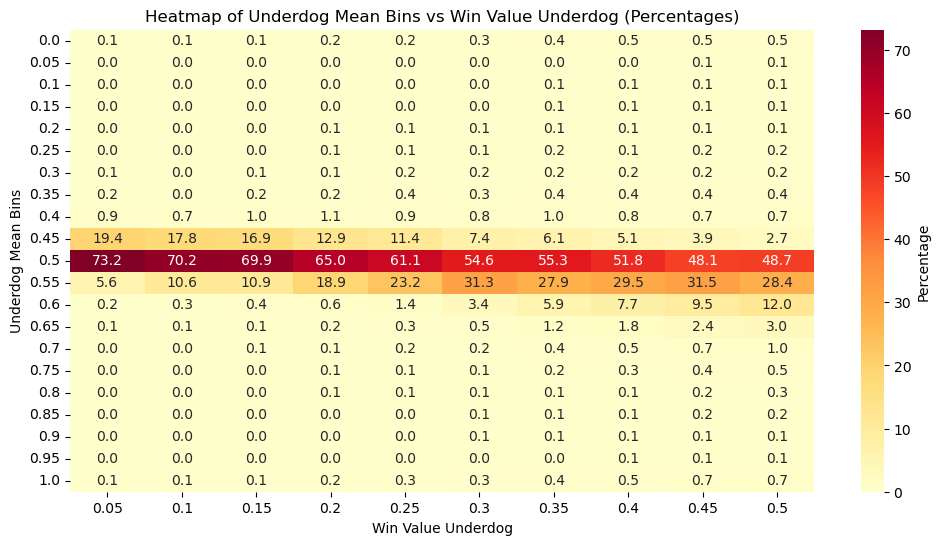

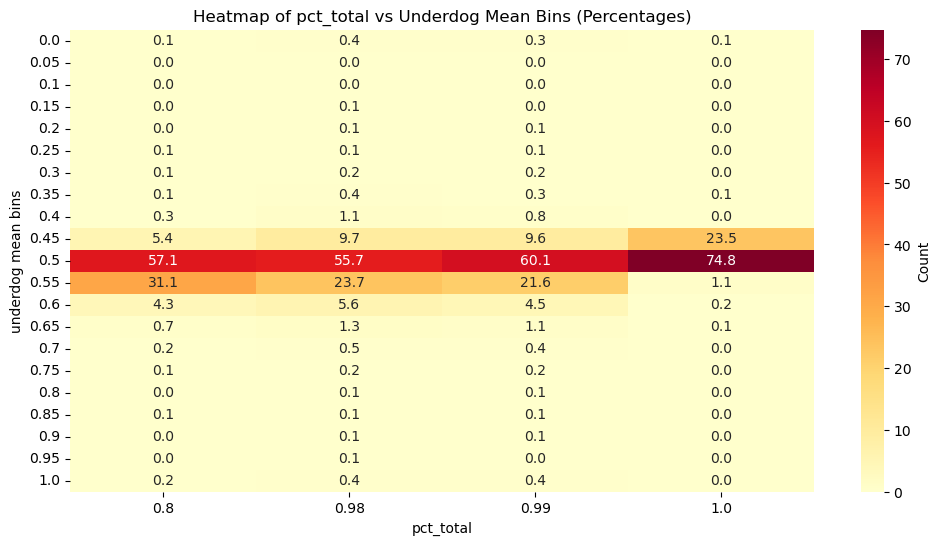

In [70]:


# Create heatmap of percentage crosstab
plt.figure(figsize=(12, 6))
sns.heatmap(
    mean_win_pct_percent.iloc[:, :-1],  # Exclude the Total column
    annot=True,
    fmt='.1f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Percentage'}
)
plt.title('Heatmap of Underdog Mean Bins vs Win Value Underdog (Percentages)')
plt.xlabel('Win Value Underdog')
plt.ylabel('Underdog Mean Bins')
plt.show()

# Create heatmap of pct_total vs underdog_mean_bins (non-percentage)
plt.figure(figsize=(12, 6))
sns.heatmap(
    mean_pct_percent.iloc[:, :-1],  # Exclude the Total column
    annot=True,
    fmt='.1f',
    cmap='YlOrRd',
    cbar_kws={'label': 'Count'}
)
plt.title('Heatmap of pct_total vs Underdog Mean Bins (Percentages)')
plt.xlabel('pct_total')
plt.ylabel('underdog mean bins')
plt.show()



Create all the combinations we're interested in to see how things shift

In [71]:

# Define the conditions to split by
conditions = {
    'level_1': [0, 100],
    'blind_combo_1': [False, True],
    'game_mode': ['expected', 'top_k'],
    'lognormal': ['log', 'normal']
}

# Create all combinations of conditions
from itertools import product
combinations = list(product(*conditions.values()))

# Generate plots for each combination
for combo in combinations:
    level, blind, mode, log = combo
    
    # Filter the dataframe
    filtered_df = df[
        (df['level_1'] == level) &
        (df['blind_combo_1'] == blind) &
        (df['game_mode'] == mode) &
        (df['lognormal'] == log)
    ]
    
    # Use existing underdog_mean_bins from the original dataframe
    filtered_df['underdog_mean_bins'] = df['underdog_mean_bins']
    
    # Create crosstabs
    mean_pct_crosstab = pd.crosstab(
        index=filtered_df['underdog_mean_bins'],
        columns=filtered_df['pct_total'],
        margins=True,
        margins_name='Total'
    )
    
    mean_win_pct_crosstab = pd.crosstab(
        index=filtered_df['underdog_mean_bins'],
        columns=filtered_df['win_value_underdog'],
        margins=True,
        margins_name='Total'
    )
    
    # Convert crosstab to percentages by column to show percentage of times each win_value_underdog results in a particular underdog_mean_bin
    mean_win_pct_percent = mean_win_pct_crosstab.iloc[:-1, :-1].div(mean_win_pct_crosstab.iloc[:-1, :-1].sum(axis=0), axis=1) * 100
    mean_win_pct_percent['Total'] = mean_win_pct_crosstab['Total']  # Add back the Total column
    #print("\nPercentage crosstab of underdog_mean bins vs win_value_underdog:")
    #print(mean_win_pct_percent)

    # Convert crosstab to percentages by column to show percentage of times each pct_total results in a particular underdog_mean_bin
    mean_pct_percent = mean_pct_crosstab.iloc[:-1, :-1].div(mean_pct_crosstab.iloc[:-1, :-1].sum(axis=0), axis=1) * 100
    mean_pct_percent['Total'] = mean_pct_crosstab['Total']  # Add back the Total column
    #print("\nPercentage crosstab of underdog_mean bins vs pct_total:")
    #print(mean_pct_percent)

    # Create a dictionary to translate conditions into 
    translator = {
        0 : 'naive',
        100 : 'best_resp',
    }
    # Create title suffix
    title_suffix = f" (fav_resp={translator[level]}, fav_blind={blind}, Mode={mode}, Log={log})"
    title_suffix_to_save = f"_{translator[level]}_blind{blind}_{mode}_{log}"

    # Create heatmap of percentage crosstab
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        mean_win_pct_percent.iloc[:, :-1],  # Exclude the Total column
        annot=True,
        fmt='.1f',
        cmap='YlOrRd',
        cbar_kws={'label': 'Percentage'}
    )
    plt.title(f'Heatmap of Underdog Mean Bins vs Win Value Underdog (Percentages) {title_suffix}')
    plt.xlabel('Win Value Underdog')
    plt.ylabel('Underdog Mean Bins')
    plt.savefig(f'early_figures/heatmap_wv{title_suffix_to_save}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.close()

    # Create heatmap of pct_total vs underdog_mean_bins (non-percentage)
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        mean_pct_percent.iloc[:, :-1],  # Exclude the Total column
        annot=True,
        fmt='.1f',
        cmap='YlOrRd',
        cbar_kws={'label': 'Count'}
    )
    plt.title(f'Heatmap of pct_total vs Underdog Mean Bins (Percentages) {title_suffix}')
    plt.xlabel('pct_total')
    plt.ylabel('underdog mean bins')
    plt.savefig(f'early_figures/heatmap_pt{title_suffix_to_save}.png', dpi=300, transparent=True, bbox_inches='tight')
    plt.close()
    


C:\Users\csong\AppData\Local\Temp\ipykernel_25744\1649767844.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['underdog_mean_bins'] = df['underdog_mean_bins']
C:\Users\csong\AppData\Local\Temp\ipykernel_25744\1649767844.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['underdog_mean_bins'] = df['underdog_mean_bins']
C:\Users\csong\AppData\Local\Temp\ipykernel_25744\1649767844.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr